<a href="https://colab.research.google.com/github/Omar-Rashdan20/datascience/blob/main/DA370_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

In [ ]:
# @title import libraries and load data
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_excel('/content/customer_dataset.xlsx')
df.head()

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day
0,10001,East,Paypal,Web,20.19,Online,22:19:00
1,10002,West,Credit,Web,17.85,Online,13:27:00
2,10003,North,Credit,Web,23.98,Online,14:27:00
3,10004,West,Paypal,Email,23.51,Book,15:38:00
4,10005,South,Credit,Web,15.33,Book,15:21:00


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# @title EDA
print(df['Payment_mode'].unique())
print('----------------------------')
print(df['how_they_buy'].unique())
print('----------------------------')
print(df['Product_type'].unique())
print('----------------------------')
print(df['Region'].unique())


['Paypal' 'Credit']
----------------------------
['Web' 'Email']
----------------------------
['Online' 'Book']
----------------------------
['East' 'West' 'North' 'South']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cust iD        510 non-null    int64  
 1   Region         510 non-null    object 
 2   Payment_mode   510 non-null    object 
 3   how_they_buy   510 non-null    object 
 4   Amount_in_usd  510 non-null    float64
 5   Product_type   510 non-null    object 
 6   Time Of Day    510 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust iD,510.0,10255.500000,147.368586,10001.00,10128.2500,10255.500,10382.75,10510.00
Amount_in_usd,510.0,38.826686,56.034412,15.06,17.7325,20.465,23.37,247.14


In [ ]:
df.isnull().sum()

Cust iD          0
Region           0
Payment_mode     0
how_they_buy     0
Amount_in_usd    0
Product_type     0
Time Of Day      0
dtype: int64

In [ ]:
P=df['Payment_mode'].value_counts(ascending=False)
print(P)
R=df['Region'].value_counts(ascending=False)
print("-------------------")
print(R)
Pr=df['Product_type'].value_counts(ascending=False)
print("-------------------")
print(Pr)
h=df["how_they_buy"].value_counts(ascending=False)
print("-------------------")
print(h)

Payment_mode
Credit    322
Paypal    188
Name: count, dtype: int64
-------------------
Region
West     211
South    106
East     101
North     92
Name: count, dtype: int64
-------------------
Product_type
Book      283
Online    227
Name: count, dtype: int64
-------------------
how_they_buy
Web      368
Email    142
Name: count, dtype: int64


In [ ]:
# @title Visualization


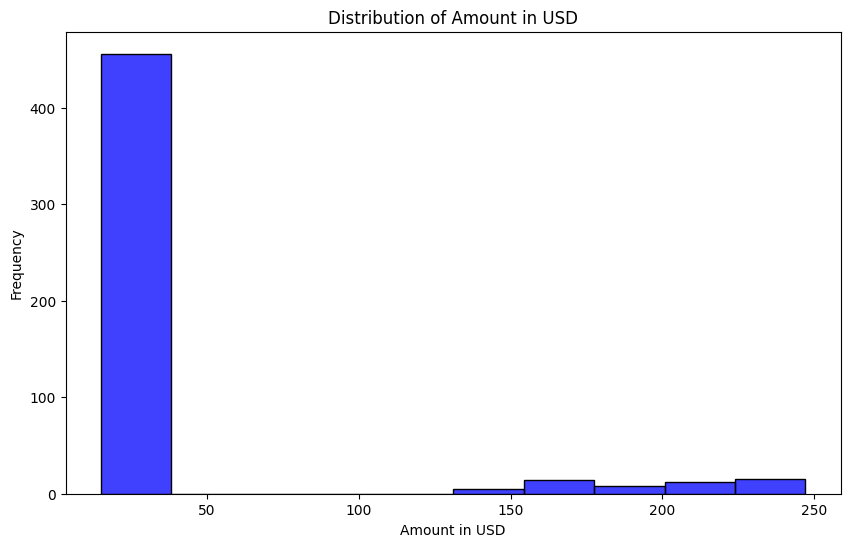

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount_in_usd'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Amount in USD')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()


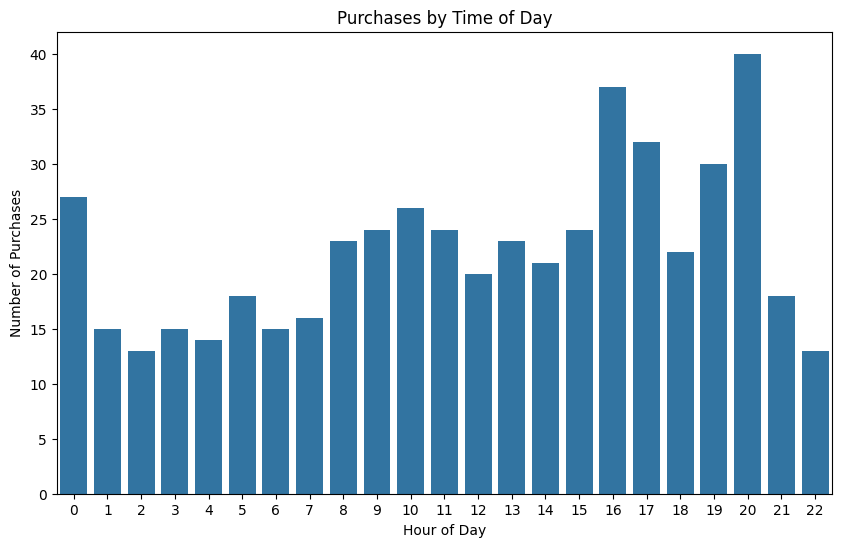

In [ ]:
df['Time Of Day'] = pd.to_datetime(df['Time Of Day'], format="%H:%M:%S")
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Time Of Day'].dt.hour)
plt.title('Purchases by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()

In [ ]:
# @title Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])
df.head()


,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day
0,10001,0,1,1,20.19,1,1900-01-01 22:19:00
1,10002,3,0,1,17.85,1,1900-01-01 13:27:00
2,10003,1,0,1,23.98,1,1900-01-01 14:27:00
3,10004,3,1,0,23.51,0,1900-01-01 15:38:00
4,10005,2,0,1,15.33,0,1900-01-01 15:21:00


In [ ]:
df.drop(columns=['Cust iD'] , inplace=True)
df['hour'] = df['Time Of Day'].dt.hour
df.head()


,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day,hour
0,0,1,1,20.19,1,1900-01-01 22:19:00,22
1,3,0,1,17.85,1,1900-01-01 13:27:00,13
2,1,0,1,23.98,1,1900-01-01 14:27:00,14
3,3,1,0,23.51,0,1900-01-01 15:38:00,15
4,2,0,1,15.33,0,1900-01-01 15:21:00,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Region         510 non-null    int64         
 1   Payment_mode   510 non-null    int64         
 2   how_they_buy   510 non-null    int64         
 3   Amount_in_usd  510 non-null    float64       
 4   Product_type   510 non-null    int64         
 5   Time Of Day    510 non-null    datetime64[ns]
 6   hour           510 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4)
memory usage: 26.0 KB


In [ ]:
# @title DBSCAN model


In [ ]:
dbscan = DBSCAN(eps=1.75, min_samples=7)
df['cluster'] = dbscan.fit_predict(df[['Amount_in_usd', 'hour']])
# Print the cluster labels
print(df['cluster'])


0      0
1      0
2      0
3      0
4      0
      ..
505    0
506    0
507    0
508    0
509    0
Name: cluster, Length: 510, dtype: int64


In [ ]:
# Print the unique cluster labels
print(df['cluster'].unique())

[ 0 -1]


In [ ]:
df.head()

,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day,hour,cluster
0,0,1,1,20.19,1,1900-01-01 22:19:00,22,0
1,3,0,1,17.85,1,1900-01-01 13:27:00,13,0
2,1,0,1,23.98,1,1900-01-01 14:27:00,14,0
3,3,1,0,23.51,0,1900-01-01 15:38:00,15,0
4,2,0,1,15.33,0,1900-01-01 15:21:00,15,0


In [ ]:
# @title silhouette score
# Calculate the silhouette score for each cluster
silhouette_scores = silhouette_score(df[['Amount_in_usd','hour']], df['cluster'])
print("Silhouette scores per cluster:", silhouette_scores)


Silhouette scores per cluster: 0.9325038683800779


In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score = davies_bouldin_score(df[['Amount_in_usd', 'hour']], df['cluster'])
print("Davies-Bouldin Index:", davies_bouldin_score)


Davies-Bouldin Index: 0.1965516492478754


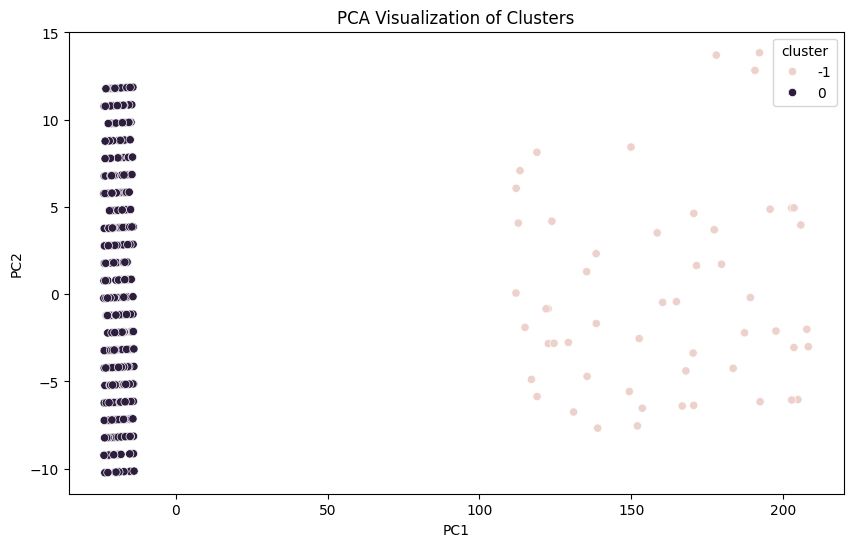

In [ ]:
# @title visualiz using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Amount_in_usd','hour']])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'])
plt.title('PCA Visualization of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Apriori (part B from Project)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

cn=["C1","C2","C3","C4","C5","C6","C7"]
df=pd.read_csv("/content/basket (1) (1).dat",delimiter=' ',names=cn)


In [ ]:
# @title EDA

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1001, 7)

In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C1    0
C2    0
C3    0
C4    0
C5    0
C6    0
C7    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C1      1001 non-null   object
 1   C2      1001 non-null   object
 2   C3      1001 non-null   object
 3   C4      1001 non-null   object
 4   C5      1001 non-null   object
 5   C6      1001 non-null   object
 6   C7      1001 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,C1,C2,C3,C4,C5,C6,C7
count,1001,1001,1001,1001,1001,1001,1001
unique,7,9,8,8,7,20,19
top,baguette,corned_b,bourbon,cracker,heineken,bordeaux,apples
freq,299,196,197,310,314,74,72


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,C1,C2,C3,C4,C5,C6,C7
0,hering,corned_b,olives,ham,turkey,bourbon,ice_crea
1,baguette,soda,hering,cracker,heineken,olives,corned_b
2,avocado,cracker,artichok,heineken,ham,turkey,sardines
3,olives,bourbon,coke,turkey,ice_crea,ham,peppers
4,hering,corned_b,apples,olives,steak,avocado,turkey


In [ ]:
# @title Preprocessing


In [ ]:
df_encoded = pd.get_dummies(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title  Apply the Apriori algorithm

frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sort the frequent itemsets by descending support
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets


    support                    itemsets
2  0.313686               (C5_heineken)
1  0.309690                (C4_cracker)
0  0.298701               (C1_baguette)
5  0.217782   (C4_cracker, C5_heineken)
3  0.209790               (C5_ice_crea)
4  0.208791  (C1_baguette, C5_heineken)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter rules with confidence greater than 1
strong_rules = rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.4) ]

# Display the filtered rules
strong_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(C4_cracker),(C5_heineken),0.309690,0.313686,0.217782,0.703226,2.241812,0.120637,2.312579,0.802440
1,(C5_heineken),(C4_cracker),0.313686,0.309690,0.217782,0.694268,2.241812,0.120637,2.257888,0.807112
2,(C1_baguette),(C5_heineken),0.298701,0.313686,0.208791,0.698997,2.228330,0.115093,2.280087,0.786018
3,(C5_heineken),(C1_baguette),0.313686,0.298701,0.208791,0.665605,2.228330,0.115093,2.097217,0.803180


In [ ]:
# @title Visualization


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


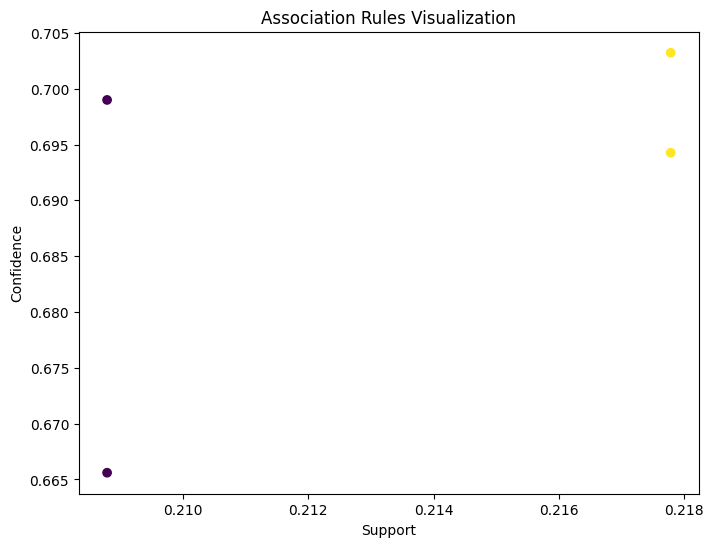

In [ ]:
rule_support = strong_rules['support'].tolist()
rule_confidence = strong_rules['confidence'].tolist()
rule_lift = strong_rules['lift'].tolist()

plt.figure(figsize=(8, 6))
plt.scatter(rule_support, rule_confidence, c=rule_lift, cmap='viridis')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')
plt.show()
